In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# print(df)
df["target"] = diabetes.target
print(df.tail())
print(df.info())

          age       sex       bmi        bp        s1        s2        s3  \
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018118  0.044485   104.0  
439 -0.011080 -0.046879  0.015491   132.0  
440  0.026560  0.044528 -0.025930   220.0  
441 -0.039493 -0.004220  0.003064    57.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non

In [2]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [3]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
df_corr = df.corr()
df_corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [5]:
cor_order = df_corr.loc[:'s6', 'target'].abs().sort_values(ascending=False)

In [6]:
cor_order

bmi    0.586450
s5     0.565883
bp     0.441484
s4     0.430453
s3     0.394789
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: target, dtype: float64

In [7]:
names = ['target', 'bmi', 's5']
diabetes_df_l = df.loc[:, names]

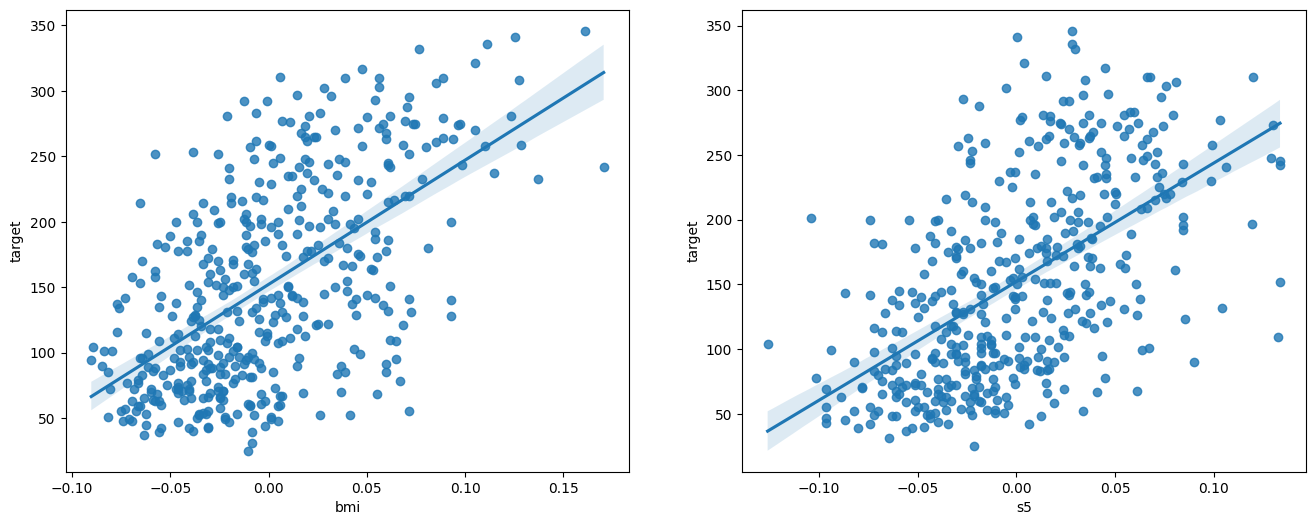

In [8]:
plt.figure(figsize=(16, 6))
for i, name in enumerate(names[1:]):
  ax=plt.subplot(1, 2, i+1)
  sns.regplot(x=name, y=names[0], data=diabetes_df_l, ax=ax)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['bmi', 's5']]
y_data=df.loc[:, 'target']

X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.3, random_state=1)

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(309, 2) (309,)
(133, 2) (133,)


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
import numpy as np
print(np.round(lr.coef_, 2))
print(np.round(lr.intercept_, 2))

[752.34 576.54]
151.65


In [13]:
pred = lr.predict(X_test)

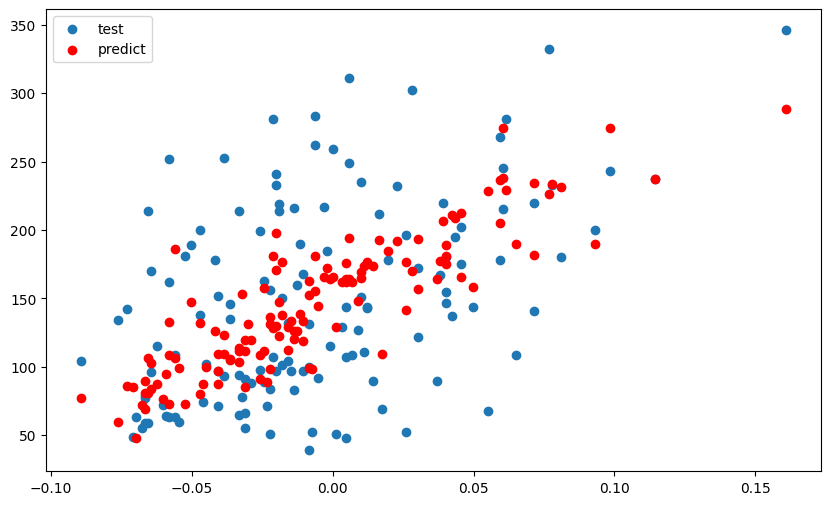

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['bmi'], y_test, label='test')  
plt.scatter(X_test['bmi'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

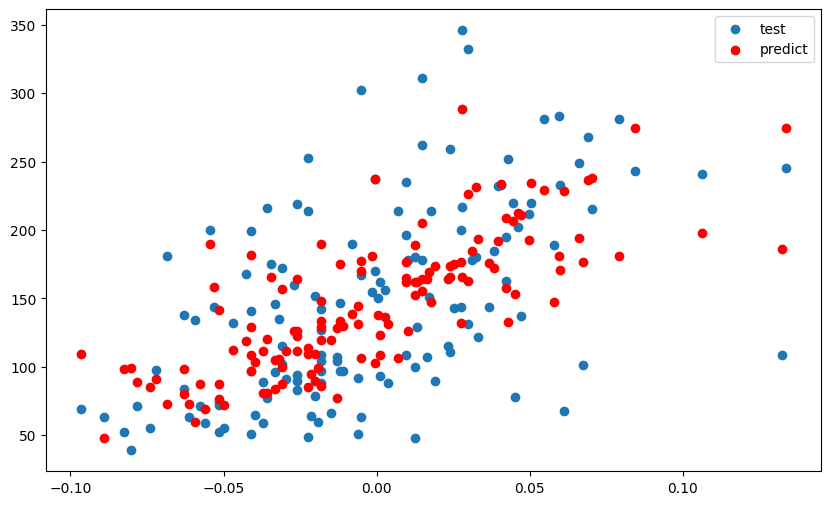

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['s5'], y_test, label='test')  
plt.scatter(X_test['s5'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred) 
test_mse = mean_squared_error(y_test, test_pred)
print(train_mse)

3208.433935612339


In [17]:
print("train data set RMSE :", round(train_mse**0.5, 3))
print("test data set RMSE :", round(test_mse**0.5, 3))

train data set RMSE : 56.643
test data set RMSE : 56.873


###### MSE(평균 제곱 오차, Mean Squared Error)를 모델 평가할 때 제곱근을 취하는 이유는 RMSE(Root Mean Squared Error)를 계산하기 위해서입니다. RMSE는 MSE의 제곱근이며, 주로 회귀 모델의 성능을 평가하는 데 사용됩니다. 이를 이해하기 위해 다음과 같은 이유들이 있습니다:

###### 단위 일치성: MSE는 오차의 제곱을 사용하여 계산됩니다. 이로 인해 오차와 동일한 단위를 가지게 됩니다. 예를 들어, 만약 예측하려는 대상이 "미터" 단위를 가지고 있다면, MSE는 "제곱 미터" 단위를 가지게 됩니다. 이런 단위의 제곱은 직관적으로 이해하기 어렵습니다. RMSE는 제곱근을 취함으로써 다시 "미터" 단위로 변환되어 해석하기 쉽게 만듭니다.

###### 오차의 크기 파악: RMSE는 평균 오차의 크기를 나타내는 지표로, 예측 오차가 얼마나 큰지에 대한 정보를 제공합니다. 이것은 모델의 성능을 더 잘 이해하고 비교하는 데 도움이 됩니다. RMSE가 작을수록 모델의 예측이 실제 값에 가깝다고 볼 수 있습니다.

###### 오차의 정규분포 가정: RMSE는 통계적 분석에서 오차가 정규 분포를 따른다고 가정하는 경우에 유용합니다. 정규 분포에서 제곱근을 취한 값은 원래 데이터의 단위와 비슷한 분포를 가질 가능성이 높습니다.

###### 수학적 편의성: RMSE는 MSE의 제곱근이므로, 계산 및 수학적 처리 측면에서도 편리합니다.

###### 따라서 RMSE는 MSE보다 모델의 예측 오차를 더 직관적으로 이해하고 해석하기 쉽게 만드는 데 도움을 줍니다. 그러나 RMSE를 사용할 때는 주의해야 합니다. 예를 들어, 이상치(outlier)가 있는 경우 RMSE는 이상치의 영향을 크게 받을 수 있으므로 이러한 경우에는 다른 평가 지표를 고려해야 할 수 있습니다.

In [23]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


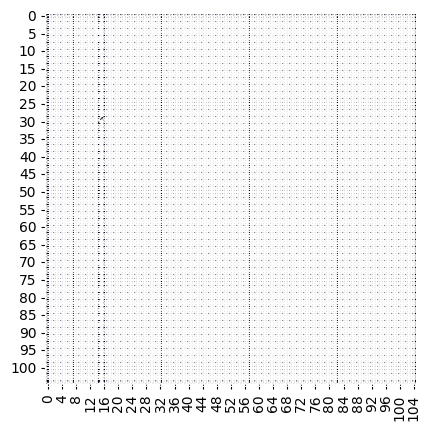

In [24]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_test_pred = lr_model.predict(X_test)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True,  cbar=False, square=True)
plt.show()

In [31]:
# X_train.head()
# X_test.head()
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
0,72.0
1,72.0
2,72.0
3,72.0
4,72.0


In [39]:
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_test, y_test_pred))
print("Precision:%.4f" % precision_score(y_test, y_test_pred, average='micro'))
print("recall:%.4f" % recall_score(y_test, y_test_pred, average='micro'))
print("F1:%.4f" % f1_score(y_test, y_test_pred, average='micro'))
# print("roc_auc:%.4f" % roc_auc_score(y_test, y_test_pred, multi_class='ovr'))

Accuracy:0.0075
Precision:0.0075
recall:0.0075
F1:0.0075
